# Chapter 10. 시계열을 위한 딥러닝

## 10.1 다양한 종류의 시계열 작업

**시계열** 데이터: 일정한 간격으로 측정하여 얻은 데이터

> **분류**: 하나 이상의 범주형 레이블을 시계열에 부여  
> **이벤트 감지**: 연속된 데이터 스트림에서 예상되는 특정 이벤트 발생을 식별  
> **이상치 탐지**: 연속된 데이터 스트림에서 발생하는 비정상적인 현상을 감지

## 10.2 온도 예측 문제

건물 지붕 위의 센서에서 측정한 시계열 데이터를 이용하여 24시간 뒤의 온도를 예측하는 문제

In [5]:
!dir

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: 28CE-1EDA

 c:\Users\JDINO\Desktop\AIFFEL\2023-AIFFEL-QUEST\InDepthDeepLearning ���͸�

2023-08-08  ���� 03:09    <DIR>          .
2023-08-08  ���� 03:09    <DIR>          ..
2023-08-07  ���� 04:08           162,298 Chapter10.ipynb
2023-07-28  ���� 06:32               628 Chapter2.ipynb
2023-07-28  ���� 06:32               614 Chapter3.ipynb
2023-07-31  ���� 02:46            12,021 Chapter4.ipynb
2023-08-07  ���� 04:08           162,298 Chapter5.ipynb
2023-07-28  ���� 04:22           159,520 deep_learning_with_python_2nd_cover.jpg
2023-07-28  ���� 04:22             1,584 README.md
               7�� ����             498,963 ����Ʈ
               2�� ���͸�  140,586,795,008 ����Ʈ ����


In [1]:
# time series data download
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip ./
!unzip ./jena_climate_2009_2016.csv.zip

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


'unzip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [6]:
# check jena weather dataset
import os
# fname = os.path.join("./jena_climate_2009_2016.csv")
fname = "./jena_climate_2009_2016.csv"


with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
print(data)

FileNotFoundError: [Errno 2] No such file or directory: './jena_climate_2009_2016.csv'

In [3]:
# fit models
from keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.6253 - accuracy: 0.8088 - val_loss: 0.2860 - val_accuracy: 0.9143
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2586 - accuracy: 0.9202 - val_loss: 0.1873 - val_accuracy: 0.9454
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1706 - accuracy: 0.9470 - val_loss: 0.1563 - val_accuracy: 0.9528
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1210 - accuracy: 0.9622 - val_loss: 0.1475 - val_accuracy: 0.9563
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0890 - accuracy: 0.9723 - val_loss: 0.1433 - val_accuracy: 0.9566
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0656 - accuracy: 0.9794 - val_loss: 0.1197 - val_accuracy: 0.9653
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0498 - accuracy: 0.9842 - val_loss: 0.1646 - val_accuracy: 0.9529
Epoch 

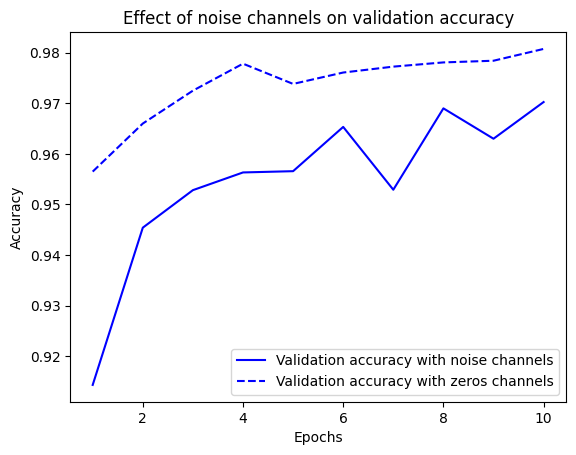

In [4]:
# plot validation accuracy
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 5.1.2 딥러닝에서 일반화의 본질

MNIST 레이블을 뒤섞은 후 훈련시켜도 훈련 손실이 잘 감소한다.

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = get_model()
history_noise = model.fit(
    train_images,
    random_train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3143 - accuracy: 0.1049 - val_loss: 2.3056 - val_accuracy: 0.1049
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2990 - accuracy: 0.1172 - val_loss: 2.3117 - val_accuracy: 0.1037
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2918 - accuracy: 0.1278 - val_loss: 2.3200 - val_accuracy: 0.1044
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2798 - accuracy: 0.1390 - val_loss: 2.3241 - val_accuracy: 0.1058
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2634 - accuracy: 0.1536 - val_loss: 2.3356 - val_accuracy: 0.1025
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2449 - accuracy: 0.1646 - val_loss: 2.3427 - val_accuracy: 0.1032
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2214 - accuracy: 0.1786 - val_loss: 2.3598 - val_accuracy: 0.1013
Epoch 

**매니폴드 가설**

임의의 두 숫자 사이에는 연속적인 중간 이미지가 있다.  
기술적으로 이는 손글씨 숫자가 가능한 모든 28 * 28 uint8 배열로 이루어진 공간 안에서 **매니폴드**를 형성한다고 말한다.  
**매니폴드 가설**은 실제 세상의 모든 데이터가 고차원 공간 안에 있는 저차원 매니폴드에 있다고 가정한다.  
> - 머신 러닝 모델은 가능한 입력 공간 안에서 비교적 간단하고, 저차원이며, 매우 구조적인 부분 공간(잠재 매니폴드)만 학습하면 된다.
> - 이런 매니폴드 중 하나 안에서 두 입력 사이를 보간하는 것이 항상 가능하다. 즉, 연속적인 경로를 따라 한 입력에서 다른 입력으로 변형할 때 모든 포인트가 이 매니폴드에 속한다.

**일반화의 원천인 보간**

일반적으로 두 숫자를 평균하면 유효한 숫자가 되지 않는다.  
잠재 매니폴드에서는 모든 포인트가 유효한 숫자가 된다.  
**지역 일반화**: 학습된 데이터 매니폴드에서 보간을 통해 달성되는 일반화
**궁극 일반화**: 추상화, 추론, 논리 등 이성이라는 인지 메커니즘으로 달성되는 일반화

**딥러닝이 작동하는 이유**

딥러닝의 본질은 크고 복잡한 곡선(매니폴드)을 선택하여 훈련 데이터 포인트에 맞을 때까지 파라미터를 점진적으로 조정하는 것에 있다.
> - 딥러닝 모델은 입력에서부터 출력으로 매끄럽고 연속적인 매핑을 구현한다. 이런 매끄러움은 동일한 속성을 가진 잠재 매니폴드를 근사하는데 도움된다.
> - 딥러닝 모델은 훈련 데이터에 있는 정보의 형태를 반영하는 식으로 구조화되는 경향이 있다. 일반적으로 심층 신경망은 학습한 표현을 계층적이고 모듈 방식으로 구조화하여 자연적인 데이터가 구성되는 방식이 반영되도록 한다.

**가장 중요한 훈련 데이터**

딥러닝이 곡선을 잘 맞추기 위해서는 입력 공간을 조밀하게 샘플링하여 훈련해야 한다.  
조밀한 훈련 데이터로 훈련 입력 사이를 보간하여 새로운 입력에 대한 이해가 원활할 수 있도록 대비한다.  
따라서 딥러닝 모델을 향상시키는 가장 좋은 방법은 더 많은 질 좋은 데이터를 훈련하는 것이다.  
데이터의 수집이 불가능하다면 눈에 띄는 패턴에 초점이 맞춰지는 과대적합을 막기 위해 **규제**를 추가한다.

## 5.2 머신 러닝 모델 평가

### 5.2.1 훈련, 검증, 테스트 세트

모델을 개발할 때 모델의 설정인 **하이퍼 파라미터**를 튜닝한다.  
검증 세트에서 모델의 성능을 평가하고 이에 맞도록 하이퍼 파라미터를 튜닝한다면 검증 세트가 훈련에 참여하지 않았더라도 검증 세트에 과대적합 될 수 있다.  
이런 현상을 방지하기 위해 오직 평가만을 위한 테스트 세트가 따로 필요하다.
데이터의 수가 적을 때에는 다양한 방법으로 검증을 진행한다.

**단순 홀드아웃 검증**

훈련할 데이터를 단순히 정해진 비율로 훈련 데이터와 검증 데이터로 나눈다.

**K-겹 교차 검증**

데이터를 동일한 크기의 K개 분할로 나눈다.  
각 분할 i에 대해 남은 K-1개의 분할로 모델을 훈련하고 분할 i로 모델을 평가한다.  
최종 점수는 K개의 점수에 대한 평균이다.

주로 데이터 분할에 따라 모델의 성능 차이가 클 때 사용된다.

**셔플링을 사용한 반복 K-겹 교차 검증**

K-겹 교차 검증을 여러 번 적용하되 K개의 분할로 나누기 전에 매번 데이터를 무작위로 섞는다.  
최종 점수는 모든 K-겹 교차 검증 결과 점수의 평균이다.  
P(반복횟수) * K개의 모델을 훈련하고 평가하기 때문에 비용이 많이 든다.

주로 가용 데이터가 적고 가능한 정확하게 모델을 평가하고자 할 때 사용한다.

### 5.2.2 상식 수준의 기준점 넘기

모델의 정확도는 기존의 훈련 데이터의 분포에 대한 확률을 넘어서야 한다.  
예로 MNIST 숫자 분류의 경우 0.1의 정확도보다는 높아야 할 것이다.  
IMDB 예제의 경우 긍정, 부정만 구분하는 것이기에 0.5의 정확도보다는 높아야 할 것이다.

### 5.2.3 모델 평가에 대해 유념해야 할 점

- **대표성 있는 데이터**: 훈련 세트와 테스트 세트가 주어진 데이터에 대한 대표성이 있어야 한다. 데이터의 분포가 훈련 세트와 테스트 세트에 골고루 분포될 수 있도록 준비해야 한다.
- **시간의 방향**: 과거에서 미래를 예측하는 경우에는 시간의 흐름을 잃지 않도록 해야 한다. 모델의 테스트는 미래에 대해 이루어져야 하므로, 테스트 세트는 미래 데이터로 이루어져있어야 한다.
- **데이터 중복**: 중복된 데이터를 분할하는 경우 검증 세트에 동일한 훈련 데이터가 들어갈 수 있다. 따라서 훈련 세트와 검증 세트가 중복되지 않도록 유의해야 한다.

## 5.3 훈련 성능 향상하기

최적적합 모델을 찾기 위해서는 먼저 과대적합이 되고 그 경계를 찾을 수 있도록 해야한다.
이 단계에서 일반적으로 발생하는 문제는 다음과 같다.
- **훈련이 안 되는 경우**: 시간이 지나도 훈련 손실이 줄어들지 않는 경우
- **훈련은 잘 시작되었지만 모델이 의미 있는 일반화를 달성하지 못하는 경우**: 상식 수준의 기준점을 넘어설 수 없는 경우
- **시간이 지나도 훈련과 검증 손실이 모두 줄어들고 과대적합되지 않는 경우**: 여전히 과소적합 상태인 경우

### 5.3.1 경사 하강법의 핵심 파라미터 튜닝하기기

훈련이 시작되지 않거나 일찍 중단되는 경우는 하이퍼 파라미터에 문제일 수 있다.  
일반적으로 학습률과 배치 크기를 튜닝하는 것만으로도 문제가 해결된다.

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 694.2538 - accuracy: 0.3404 - val_loss: 2.3033 - val_accuracy: 0.1959
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 2.8090 - accuracy: 0.2392 - val_loss: 2.2994 - val_accuracy: 0.2477
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 2.5716 - accuracy: 0.2188 - val_loss: 2.0734 - val_accuracy: 0.2995
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4244 - accuracy: 0.2257 - val_loss: 2.3196 - val_accuracy: 0.1724
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4314 - accuracy: 0.2335 - val_loss: 2.8928 - val_accuracy: 0.3020
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4514 - accuracy: 0.2304 - val_loss: 2.0852 - val_accuracy: 0.2075
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.5577 - accuracy: 0.2314 - val_loss: 2.1720 - val_accuracy: 0.2192
Epoc

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3271 - accuracy: 0.9130 - val_loss: 0.1671 - val_accuracy: 0.9535
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1264 - accuracy: 0.9654 - val_loss: 0.2788 - val_accuracy: 0.9320
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0952 - accuracy: 0.9741 - val_loss: 0.1631 - val_accuracy: 0.9644
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0836 - accuracy: 0.9788 - val_loss: 0.1742 - val_accuracy: 0.9694
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0681 - accuracy: 0.9832 - val_loss: 0.2263 - val_accuracy: 0.9645
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0631 - accuracy: 0.9846 - val_loss: 0.2009 - val_accuracy: 0.9677
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0505 - accuracy: 0.9873 - val_loss: 0.2726 - val_accuracy: 0.9678
Epoch 

- 학습률을 낮추거나 높인다. 학습률이 너무 높으면 최적적합을 뛰어넘어 발산할 수 있다. 학습률이 너무 낮으면 학습 속도가 느려져 멈춰보일 수 있다.
- 배치 크기를 증가시킨다. 배치 샘플을 늘려 분산이 낮아지도록 만드는 것이 좋다.

### 5.3.2 구조에 대해 더 나은 가정하기

모델이 훈련되어도 검증지표가 나아지지 않을 수 있다.  
이유 중 하나는 단순히 입력 데이터에 타깃 예측을 위한 정보가 충분치 않아서이다.  
다른 하나는 사용하는 모델의 종류가 문제에 적합하지 않아서이다.  
이미지, 텍스트, 시계열 등 다양한 데이터 종류에 알맞는 모델 구조를 알아야 한다.

### 5.3.3 모델 용량 늘리기

검증 지표가 향상된 후에는 모델을 과대적합 시켜야한다.

In [8]:
# small logistic regression model with MNIST
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6555 - accuracy: 0.8408 - val_loss: 0.3589 - val_accuracy: 0.9021
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.9025 - val_loss: 0.3090 - val_accuracy: 0.9139
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.3178 - accuracy: 0.9115 - val_loss: 0.2925 - val_accuracy: 0.9186
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.9155 - val_loss: 0.2856 - val_accuracy: 0.9200
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2922 - accuracy: 0.9179 - val_loss: 0.2800 - val_accuracy: 0.9222
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2858 - accuracy: 0.9202 - val_loss: 0.2732 - val_accuracy: 0.9244
Epoch 7/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2810 - accuracy: 0.9211 - val_loss: 0.2713 - val_accuracy: 0.9260
Epoch 

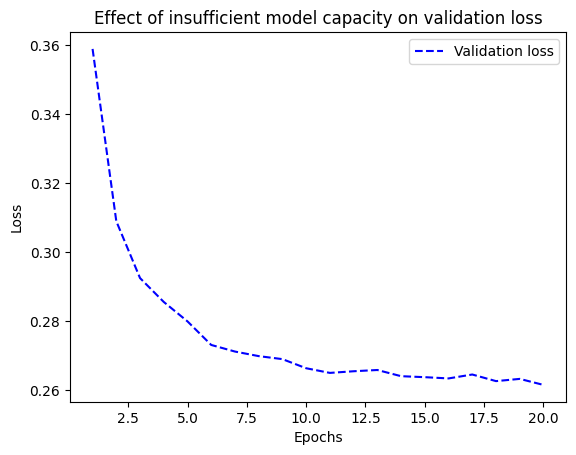

In [10]:
# plot validation loss
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

모델이 과대적합할 수 없는 것처럼 보인다면 용량이 더 큰 모델로 표현하여야 한다.  
층의 수를 늘리거나, 층의 크기를 늘리거나, 현 문제에 더 적합한 층을 추가하거나 해야 한다.

In [11]:
# large logistic regression model with MNIST
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3705 - accuracy: 0.8941 - val_loss: 0.2151 - val_accuracy: 0.9363
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1685 - accuracy: 0.9509 - val_loss: 0.1332 - val_accuracy: 0.9609
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1197 - accuracy: 0.9649 - val_loss: 0.1253 - val_accuracy: 0.9620
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0913 - accuracy: 0.9732 - val_loss: 0.1006 - val_accuracy: 0.9694
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9786 - val_loss: 0.0931 - val_accuracy: 0.9728
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0594 - accuracy: 0.9817 - val_loss: 0.1028 - val_accuracy: 0.9700
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.0933 - val_accuracy: 0.9731
Epoch 

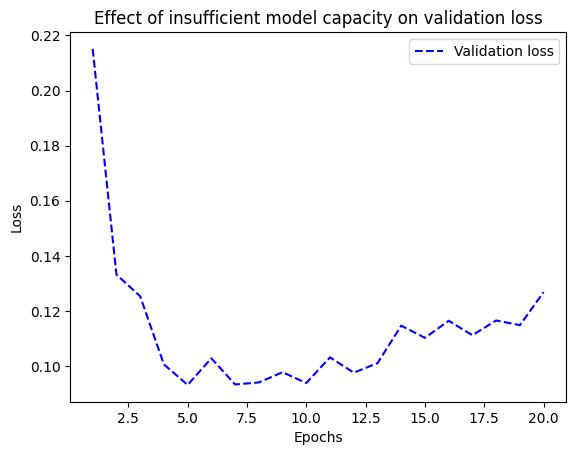

In [12]:
# plot validation loss
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
class my_model(tf.keras.Model):
    def __init__(self, dim):
        super(my_model, self).__init__()
        self.Base = tf.keras.applications.VGG16(
        input_shape=(dim),
        include_top = False,
        weights = 'imagenet'
        )
        self.GAP = tf.keras.layers.GlobalAveragePooling2D()
        self.BAT = tf.keras.layers.BatchNormalization()
        self.DROP = tf.keras.layers.Dropout(rate=0.1)
        self.DENS = tf.keras.layers.Dense(256, activation='relu', name = 'dense_A')
        self.OUT = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.Base(inputs)
        g = self.GAP(x)
        b = self.BAT(g)
        d = self.DROP(b)
        d = self.DENS(d)

        return self.OUT(d)

    # AFAIK: The most convenient method to print model.summary()
    # similar to the sequential or functional API like.
    def build_graph(self):
        x = tf.keras.layers.Input(shape=(dim))
        return tf.keras.Model(inputs=[x], outputs=self.call(x))

dim = (124,124,3)
model = my_model((dim))
model.build((None, *dim))
model.build_graph().summary()
# Just showing all possible argument for newcomer.
tf.keras.utils.plot_model(
model.build_graph(), # here is the trick (for now)
to_file='model.png', dpi=96, # saving
show_shapes=True, show_layer_names=True, # show shapes and layer name
expand_nested=False # will show nested block
)